# Аналитическое исследование для компании «Мегафон»

Как и любой бизнес, компания «Мегафон» хочет повысить удовлетворённость своих клиентов качеством услуг. Это важная задача для удержания пользователей — как давних, так и недавно привлечённых. Ведь затраты на маркетинг и продвижение не оправдаются, если клиент уйдёт из-за низкого качества связи. Однако в реальном мире ресурсы всегда ограничены, и в единицу времени технический отдел может решить конечное количество задач. 

Чтобы делать это наиболее эффективно, важно определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов, и в первую очередь направить ресурсы на работу с ними. Для этого «Мегафон» провёл опрос своих клиентов, предложив им оценить уровень удовлетворённости качеством связи.

#### Цель: Установить существует ли зависимость между оценкой, которую ставит клиент в опросе, от технических показателей, которые были собраны. В случае существования зависимости описать ее характер и свойства.

#### Гипотезы (первичные):
- Н0 - зависимость между оценкой, которую ставит клиент в опросе, и техническими показателями, которые были собраны, отсутствует.
- Н1 - зависимость между оценкой, которую ставит клиент в опросе, и техническими показателями, которые были собраны, существует.

#### Описание данных:
В ходе опроса компания «Мегафон» предложила своим клиентам оценить уровень удовлетворённости качеством связи по десятибалльной шкале (где 10 — это «отлично», а 1 — «ужасно»). Если клиент оценивал качество связи на 9 или 10 баллов, опрос заканчивался. Если клиент ставил оценку ниже 9, задавался второй вопрос — о причинах неудовлетворённости качеством связи с предоставленными пронумерованными вариантами ответа. Ответ можно было дать в свободном формате или перечислить номера ответов через запятую.

Рисунок 1. Инфографика сбора данных
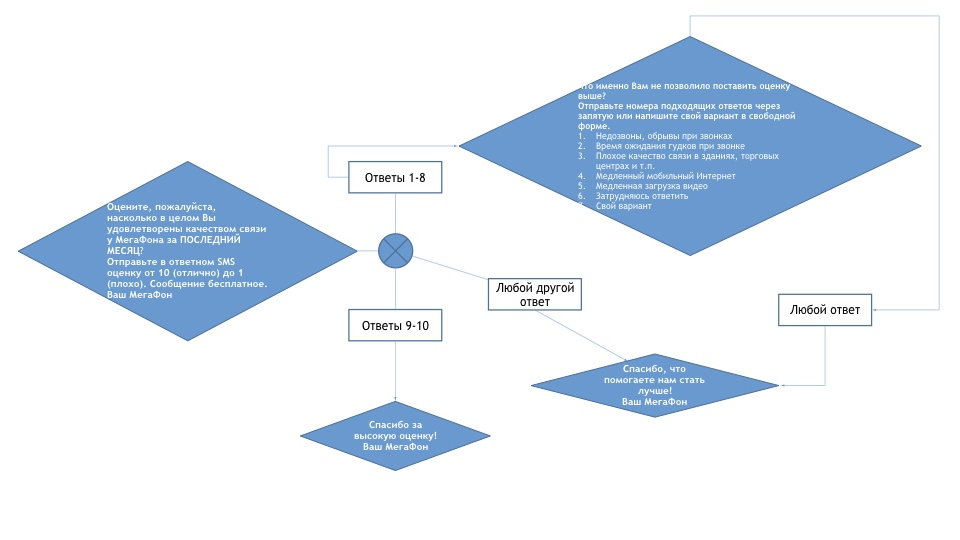

##### Исследование и описание существующих данных

In [294]:
#импорт библиотек для разведочного анализа данных
import modin.pandas as md #*
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns

from sklearn import preprocessing

#### Для обработки данных я использую проект Modin*
Modin - находящийся на ранней стадии разработки проект UC Berkeley’s RISELab для упрощения процесса распределённых вычислений. Это многопроцессная библиотека для работы с датафреймами. API modin точно такой же, как и у pandas, что позволяет разработчикам ускорить процесс работы.

Например, на восьмиядерных процессорах modin ускоряет выполнение запросов в 4 раза.

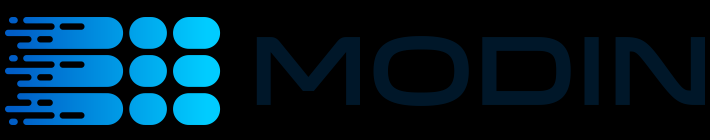


In [295]:
#импорт
df = md.read_csv('megafon.csv', index_col=0, parse_dates=True)
df

,Q1,Q2,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
user_id,,,,,,,,,,
1,5,NaN,775.48846,360.13,86.56,3.93,1859.15,2309,1007.82,83
2,5,4,861.96324,3023.54,411.18,1.27,667.47,2080,255.36,425
3,1,4,261.11860,790.96,34.20,1.79,1079.60,6367,535.85,485
4,8,3,179.18564,2590.97,325.88,0.80,7053.81,3218,1221.02,51
5,2,"2, 3, 4",351.99208,731.61,223.54,1.15,4550.38,1767,2336.56,68
...,...,...,...,...,...,...,...,...,...,...
3108,3,"1, 4, 5",519.96475,1045.70,44.61,0.47,4523.66,1468,1044.66,304
3109,3,"1, 3, 4, 5",171.52629,670.32,40.94,2.35,1711.54,2780,954.91,251
3110,10,NaN,187.44936,590.29,186.36,2.06,3182.83,2195,1094.62,109


In [296]:
#сбор первичных метаданных (количество значений и их тип)
df.info()

<class 'modin.pandas.dataframe.DataFrame'>
Int64Index: 3112 entries, 1 to 3112
Data columns (total 10 columns):
 #   Column                                     Non-Null Count  Dtype  
---  -----------------------------------------  --------------  -----  
 0   Q1                                         3110 non-null   object
 1   Q2                                         1315 non-null   object
 2   Total Traffic(MB)                          3112 non-null   float64
 3   Downlink Throughput(Kbps)                  3112 non-null   float64
 4   Uplink Throughput(Kbps)                    3112 non-null   float64
 5   Downlink TCP Retransmission Rate(%)        3112 non-null   float64
 6   Video Streaming Download Throughput(Kbps)  3112 non-null   float64
 7   Video Streaming xKB Start Delay(ms)        3112 non-null   int64
 8   Web Page Download Throughput(Kbps)         3112 non-null   float64
 9   Web Average TCP RTT(ms)                    3112 non-null   int64
dtypes: float64(6), object(2),

C:\Users\Mi\anaconda3\lib\site-packages\modin\pandas\series.py:140: UserWarning:

Distributing <class 'int'> object. This may take some time.



In [297]:
#сбор первичных метаданных (поиск NaN-значений)
df.isna().sum()

Q1                                              2
Q2                                           1797
Total Traffic(MB)                               0
Downlink Throughput(Kbps)                       0
Uplink Throughput(Kbps)                         0
Downlink TCP Retransmission Rate(%)             0
Video Streaming Download Throughput(Kbps)       0
Video Streaming xKB Start Delay(ms)             0
Web Page Download Throughput(Kbps)              0
Web Average TCP RTT(ms)                         0
dtype: int64

In [298]:
#сбор первичных метаданных (меры центральной тенденции)
df.describe(include=[np.number])

,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms)
count,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000,3112.000000
mean,406.282339,2220.774023,170.702381,1.834518,5728.806848,2107.596080,2100.258901,194.195051
std,220.593815,2629.824405,204.031286,2.074593,5161.475235,1582.423057,2062.509549,267.387914
min,100.026680,13.260000,6.110000,0.050000,0.000000,239.000000,0.000000,0.000000
25%,214.261193,652.297500,70.735000,0.720000,2324.550000,1280.000000,1018.002500,74.000000
50%,363.999720,1404.230000,119.435000,1.300000,4436.500000,1672.000000,1670.695000,118.000000
75%,572.524325,2823.645000,210.617500,2.240000,7611.440000,2312.000000,2519.987500,207.000000
max,887.078270,39817.640000,4141.850000,31.200000,58566.030000,21392.000000,35603.970000,3471.000000


In [299]:
#сбор первичных метаданных (для типа .object)
df.describe(include=[np.object])

,Q1,Q2
count,3110,1315
unique,49,51
top,10,3
freq,846,190


In [300]:
#исследуем природу нерациональных включений в Q1(ответы на первый вопрос)
answers_q1 = md.DataFrame(df.groupby('Q1')['Q1'].count())

In [301]:
#просмотр некорректных значений
answers_q1 = answers_q1[answers_q1['Q1'] < 10].index
answers_q1

Index(['***** ** ***', '0, 1, 5', '1, 3', '1, 6', '1, 8', '10, 5', '10, 50',
       '10, 9', '11', '15', '19', '2, 5', '2, 9', '20, 89031081392',
       '3 - дер.Ширяево Волоколамского района, 9 - в Москве',
       '3 тройка, связь отвратительная, жалко платить за такой тарив', '3, 7',
       '3, 9',
       '4. Тульская область Заокский район. Романовские дачи связи почти нет',
       '5, 6', '5, 7', '?', 'Hi', 'Без з', 'Да',
       'Когда в Москве-10 а когда в калужской области в деревне Бели-1',
       'Немагу дать атценку денги незашто снимаеть скоро выклучаю', 'Нет',
       'ОЦЕНКА-3/НЕВАЖНО/', 'Отвратительно',
       'Очень  хорошо. Обслуживания  я довольно. Спасибо вам.555',
       'Пока не понял', 'Поохое', 'Ужасно', 'Чдтчдтччдтччч',
       'Чем даль ше,тем лучше.Спасибо за ваш труд.Оценка 10 !',
       'Я в Смол. Области живу сейчас, не пользуюсь телефоном совсем',
       'Я ценой услуг не удовлетворен'],
      dtype='object', name='Q1')

In [302]:
#так как некорректные значения составляют менее 1% от общего числа, избавляемся от них
df = df.loc[df['Q1'].isin(answers_q1) == False] 

In [303]:
#изменяем тип Q1 на float
df['Q1'] = md.to_numeric(df['Q1'])
df.loc[df['Q1'] == 0, 'Q1'] = 1

In [304]:
#создаем сводную таблицу средних значений метрик
df_mean = md.DataFrame()
for i in range(1,11):
    df_mean = df_mean.append(df[df['Q1']==i].describe().iloc[1])

C:\Users\Mi\anaconda3\lib\site-packages\modin\pandas\dataframe.py:150: UserWarning:

Distributing <class 'NoneType'> object. This may take some time.

C:\Users\Mi\anaconda3\lib\site-packages\modin\error_message.py:55: UserWarning:

`DataFrame.append` for empty DataFrame defaulting to pandas implementation.

C:\Users\Mi\anaconda3\lib\site-packages\modin\pandas\dataframe.py:150: UserWarning:

Distributing <class 'pandas.core.frame.DataFrame'> object. This may take some time.

C:\Users\Mi\anaconda3\lib\site-packages\modin\pandas\dataframe.py:566: UserWarning:

Due to https://github.com/pandas-dev/pandas/issues/35092, Pandas ignores sort=False; Modin correctly does not sort.



In [305]:
#визуализация абсолютных средних значений по оценкам пользователей, с интерактивными функциями
df_mean = md.DataFrame()
for i in range(1,11):
    df_mean = df_mean.append(df[df['Q1']==i].describe().iloc[1])
    
#интерактивная визуализация
col = df.columns
fig_1 = go.Figure()
for feature in col[2:]:
    fig_1.add_trace(
        go.Scatter(
            x = df_mean['Q1'].unique(),
            y = df_mean[feature],
            name = str(feature)
        )
    )
    
fig_1.update_layout(
       title={
        'text': "Средние значения параметров, рассчитанные от оценок качества связи клиентов Мегафон",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig_1.show()

(apply_list_of_funcs pid=1860) 


In [306]:
#исследуем распределение Q2(ответы на второй вопрос), для этого разделяем ответы
for i in range(1, 8):
    j = str(i)
    df[j] = df['Q2'].str.contains(j)

In [307]:
#визуализация распределения ответов на второй вопрос (интерактивный)
fig_2 = go.Figure(data=[
    go.Bar(x=df['Q1'], y=df['1'], name='Недозвоны, обрывы при звонках'),
    go.Bar(x=df['Q1'], y=df['2'], name='Время ожидания гудков при звонке'),
    go.Bar(x=df['Q1'], y=df['3'], name='Плохое качество связи в зданиях'),
    go.Bar(x=df['Q1'], y=df['4'], name='Медленный мобильный интернет'),
    go.Bar(x=df['Q1'], y=df['5'], name='Медленная загрузка видео'),
    go.Bar(x=df['Q1'], y=df['6'], name='Затрудняюсь ответить'),
    go.Bar(x=df['Q1'], y=df['7'], name='Свой вариант')
])

fig_2.update_layout(
       title={
        'text': 'Распределение вариантов ответов о причинах неудовлетворенности услугами предоставляемой связи',
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'}
)

fig_2.show()

C:\Users\Mi\anaconda3\lib\site-packages\modin\error_message.py:55: UserWarning:

`Series.hist_series` defaulting to pandas implementation.



<AxesSubplot:>

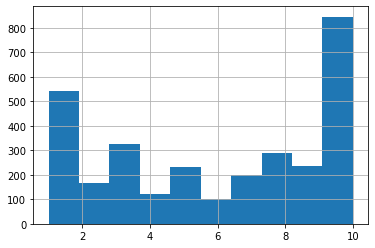

In [308]:
#Распределение оценок качества связи
df['Q1'].hist()

Первичная оценка:

- данные в отношении 3112 клиентов компании;
- 2 параметра (.object) содержат NaN-значения (Q1-2, Q2-1797);
- в списке ответов на вопрос (об удовлетворенности качеством связи) находится 49 уникальных значений, хотя вопрос предусматривает 9;
- все метрики, за исключением 'Total Traffic(MB)', имеют визуальные признаки наличия зависимости с оценкой пользователей о качестве связи;
- распределение вариантов ответов о причинах неудовлетворенности услугами предоставляемой связи свидетельствует о трех лидерах опроса, стабильно проявляющих себя для всех оценок ('Недозвоны, обрывы при звонках', 'Плохое качество связи в зданиях',  'Медленный мобильный интернет';
- существует нехарактерный выброс на уровне оценки '1' - 'Свой вариант';
- зависимая переменная 'Q1' не подчинена закону нормального распределения;
- наибольшее количество оценок сосредоточено в значениях '10' и '1'.

#### Трансформация задач 

Исходя из описанных данных, а также цели исследования, для получения наиболее качественных результатов анализа провожу конкретизирование, трансформацию задач и гипотез исследования. Для удобства представления информации и сегментирования гипотез следующий блок будет разделен на две логические составляющие:

###### 1. Преследование формальной цели*, сформулированной в ТЗ заказчиком


1.1 Формулирование группы гипотез
- Н0 оставляем без изменений - зависимость между оценкой, которую ставит клиент в опросе, и техническими показателями, которые были собраны, отсутствует.
- Н1 конкретизируем по имеющимся метрикам:
    - Н1.1 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Total Traffic(MB), существует.
    - Н1.2 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Downlink Throughput(Kbps), существует.
    - Н1.3 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Uplink Throughput(Kbps), существует.
    - Н1.4 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Downlink TCP Retransmission Rate(%), существует.
    - Н1.5 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Video Streaming Download Throughput(Kbps), существует.
    - Н1.6 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Video Streaming xKB Start Delay(ms), существует.
    - Н1.7 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Web Page Download Throughput(Kbps), существует.
    - Н1.8 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Web Average TCP RTT(ms), существует.
    

1.2 В случае подтверждения гипотезы Н1, будет описан характер и ее свойства.

###### 2. Поиск дополнительных связей

Важно определить, какие технические показатели качества связи сильнее всего влияют на удовлетворённость клиентов, и в первую очередь направить ресурсы на работу с ними. Для этого не менее целесообразно изучить существующие связи технических параметров с субъективными причинами неудовлетворенности клиентов.


2.1 Формулирование гипотез
будут использованы аналогичные 1 пункту гипотезы, в которых будет осуществлена замена зависимой переменной на 'Q2' сегментированные на следующие варианты ответов: 'Недозвоны, обрывы при звонках', 'Плохое качество связи в зданиях', 'Медленный мобильный интернет'.


2.2 В случае подтверждения гипотезы Н1, будет описан характер и ее свойства.


###### 3.  Расчет унифицированных характеристик значимости метрик для продукта на основе коэффициентов значимости рассчитанных моделей


В данной части исследования будут проанализированы и собраны воедино имеющиеся коэффициенты значимых метрик продукта.  

#### 1.  Преследование цели*, сформулированной в ТЗ 

Так как, зависимая переменная сущестсвует в рамках порядкового типа данных, а это почти худший вариант данных, не можем исследовать связи мультиномиальным способом, потому что такой способ не учитывает порядок значений, но и не можем использовать линейную регрессию, потому что мы не можем определить на сколько один порядок больше\меньше другого.

Ситуация отягощена отсутствием нормального распределения зависимой переменной. 
Выход один - использовать непараметрические порядковые методы, но так как групп более двух использую GLM (Generalised Lineral Modaels), а именно порядковую регрессию (проще всего использовать готовый пакет [bevel](https://github.com/Shopify/bevel) или переписать вручную).

Распределение - Кумулятивное пороговое.

Функция связи - Порядковый логит.

In [309]:
#импорт кастомной библиотеки
from bevel.linear_ordinal_regression import OrderedLogit

In [310]:
#выделение зависимой и независимых переменных
Y = df['Q1']
X = df[['Total Traffic(MB)', 'Downlink Throughput(Kbps)',
       'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)',
       'Video Streaming Download Throughput(Kbps)',
       'Video Streaming xKB Start Delay(ms)',
       'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)']]

In [311]:
#нормализация данных
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(x_scaled)

In [312]:
X.columns = ['Total Traffic(MB)', 'Downlink Throughput(Kbps)',
       'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)',
       'Video Streaming Download Throughput(Kbps)',
       'Video Streaming xKB Start Delay(ms)',
       'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)']

In [313]:
#построение модели
ol = OrderedLogit()
ol.fit(X, Y)

In [263]:
#вывод summary
ol.print_summary()

n=3070
                                             beta  se(beta)      p  lower 0.95  upper 0.95     
attribute names                                                                                
Total Traffic(MB)                         -0.1669    0.1156 0.1486     -0.3934      0.0596     
Downlink Throughput(Kbps)                  0.7675    0.6328 0.2252     -0.4729      2.0078     
Uplink Throughput(Kbps)                    1.0986    0.6442 0.0882     -0.1641      2.3612    .
Downlink TCP Retransmission Rate(%)       -1.6517    0.5290 0.0018     -2.6884     -0.6149   **
Video Streaming Download Throughput(Kbps)  0.3794    0.5014 0.4492     -0.6033      1.3621     
Video Streaming xKB Start Delay(ms)       -1.1703    0.4531 0.0098     -2.0584     -0.2822   **
Web Page Download Throughput(Kbps)         0.8115    0.6459 0.2090     -0.4545      2.0775     
Web Average TCP RTT(ms)                   -1.9714    0.4707 0.0000     -2.8940     -1.0488  ***
---
Signif. codes:  0 '***' 0.001

###### Результаты п. 1 на уровне значимости 0.05:
Н0 - зависимость между оценкой, которую ставит клиент в опросе, и техническими показателями, которые были собраны, отсутствует - __отвергнута__.

Н1.1 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Total Traffic(MB), существует - __отвергнута__.

Н1.2 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Downlink Throughput(Kbps), существует - __отвергнута__.

Н1.3 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Uplink Throughput(Kbps), существует - __отвергнута__.

Н1.4 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Downlink TCP Retransmission Rate(%), существует - __принята__.

Н1.5 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Video Streaming Download Throughput(Kbps), существует - __отвергнута__.

Н1.6 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Video Streaming xKB Start Delay(ms), существует - __принята__.

Н1.7 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Web Page Download Throughput(Kbps), существует - __отвергнута__.

Н1.8 - зависимость между оценкой, которую ставит клиент в опросе, и техническим показателем Web Average TCP RTT(ms), существует - __принята__.

#### 2. Поиск дополнительных связей

In [345]:
#создаем копию фрейма для исследования
dfc = df.copy()

In [346]:
#заполняем NaN-значения
dfc = dfc.fillna(0)

In [347]:
#изменяем тип bool на int
dfc[['1','2', '3', '4', '5', '6', '7']] = dfc[['1','2', '3', '4', '5', '6', '7']].astype(int)

C:\Users\Mi\anaconda3\lib\site-packages\modin\error_message.py:55: UserWarning:

`DataFrame.setitem_unhashable_key` defaulting to pandas implementation.

C:\Users\Mi\anaconda3\lib\site-packages\modin\pandas\dataframe.py:150: UserWarning:

Distributing <class 'pandas.core.frame.DataFrame'> object. This may take some time.



In [348]:
#просмотр мер центральной тенденции
dfc.describe()

,Q1,Total Traffic(MB),Downlink Throughput(Kbps),Uplink Throughput(Kbps),Downlink TCP Retransmission Rate(%),Video Streaming Download Throughput(Kbps),Video Streaming xKB Start Delay(ms),Web Page Download Throughput(Kbps),Web Average TCP RTT(ms),1,2,3,4,5,6,7
count,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000,3070.000000
mean,6.010098,405.604507,2216.374570,170.421205,1.834629,5731.982150,2111.157329,2095.351609,194.155700,0.211075,0.059935,0.229967,0.203909,0.072313,0.004235,0.028013
std,3.472308,220.540730,2617.155148,204.418625,2.064154,5154.840908,1588.886821,2045.705876,268.497014,0.408138,0.237405,0.420880,0.402968,0.259047,0.064946,0.165037
min,0.000000,100.026680,13.260000,6.110000,0.050000,0.000000,239.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,213.330472,653.772500,70.387500,0.720000,2324.210000,1283.250000,1018.787500,74.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.000000,363.245900,1404.685000,119.210000,1.300000,4435.180000,1673.000000,1671.240000,118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,572.316585,2824.195000,210.610000,2.250000,7618.285000,2312.000000,2518.262500,206.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,10.000000,887.078270,39817.640000,4141.850000,31.200000,58566.030000,21392.000000,35603.970000,3471.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [349]:
#удаляем столбцы содержащие информацю о непопулярных причинах неудовлетворенности
dfc = dfc.drop(['2', '5', '6', '7'], axis=1)

In [350]:
#выбрасываем столбцы со значениями ответов на вопросы
dfc = dfc.drop(['Q1', 'Q2'], axis=1)

In [359]:
#переходим на pandas, так как statsmodels с modin пока не работает
dfc.to_csv('dfc.csv')
dfc = pd.read_csv('dfc.csv')

(pid=8232) Windows fatal exception: access violation
(pid=8232) 


In [363]:
#импорт библиотек для биномиальной регрессии
import statsmodels.api as sm 
import statsmodels.formula.api as sf

In [364]:
#разделение данных на независимые и зависимые переменные 
Y1 = dfc['1']
Y3 = dfc['3']
Y4 = dfc['4']
X = dfc[['Total Traffic(MB)', 'Downlink Throughput(Kbps)',
       'Uplink Throughput(Kbps)', 'Downlink TCP Retransmission Rate(%)',
       'Video Streaming Download Throughput(Kbps)',
       'Video Streaming xKB Start Delay(ms)',
       'Web Page Download Throughput(Kbps)', 'Web Average TCP RTT(ms)']]


In [365]:
#построение математических моделей
logit1 = sm.GLM(Y1, X, family=sm.families.Binomial())
logit3 = sm.GLM(Y3, X, family=sm.families.Binomial())
logit4 = sm.GLM(Y4, X, family=sm.families.Binomial())
result1 = logit1.fit()
result3 = logit3.fit()
result4 = logit4.fit()

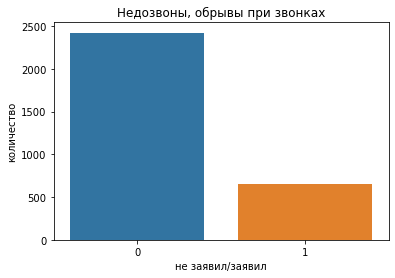

In [369]:
#распределение ответов по заданной шкале
sns.countplot(x = '1', data = dfc)
plt.xlabel('не заявил/заявил')
plt.ylabel('количество')
plt.title('Недозвоны, обрывы при звонках')
plt.show()

In [366]:
#Generalized Linear Model Regression Results
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      1   No. Observations:                 3070
Model:                            GLM   Df Residuals:                     3062
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1630.8
Date:                Sun, 31 Oct 2021   Deviance:                       3261.6
Time:                        17:55:53   Pearson chi2:                 3.22e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Total Traffic(MB)                            -0.0013      0.000     -6.975      0.000      -0.002      -0.001
Downlink Throughput(Kbps)                 -2.193e-05   2.34e-05     -0.937      0.349   -6.78e-05    2.39e-05
Uplink Throughput(Kbps)                      -0.0008      0.000     -2.645      0.008      -0.001      -0.000
Downlink TCP Retransmission Rate(%)          -0.0716      0.024     -2.945      0.003      -0.119      -0.024
Video Streaming Download Throughput(Kbps) -3.009e-05   1.17e-05     -2.579      0.010    -5.3e-05   -7.22e-06
Video Streaming xKB Start Delay(ms)       -3.232e-05   2.71e-05     -1.194      0.232   -8.54e-05    2.07e-05
Web Page Download Throughput(Kbps)        -3.532e-05   2.55e-05     -1.386      0.166   -8.53e-05    1.46e-05
Web Average TCP RTT(ms)                      -0.0005      0.000     -2.671      0.008      -0.001      -0.000
=============================================================================================================
"""

###### Результаты п. 1 на уровне значимости 0.05:
Н0 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническими показателями, которые были собраны, отсутствует - __отвергнута__.

Н1.1 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническим показателем Total Traffic(MB), существует - __принята__.

Н1.2 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническим показателем Downlink Throughput(Kbps), существует - __отвергнута__.

Н1.3 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническим показателем Uplink Throughput(Kbps), существует - __принята__.

Н1.4 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническим показателем Downlink TCP Retransmission Rate(%), существует - __принята__.

Н1.5 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническим показателем Video Streaming Download Throughput(Kbps), существует - __принята__.

Н1.6 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническим показателем Video Streaming xKB Start Delay(ms), существует - __отвергнута__.

Н1.7 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническим показателем Web Page Download Throughput(Kbps), существует - __отвергнута__.

Н1.8 - зависимость между причиной неудовлетворенности связью 'Недозвоны, обрывы при звонках' и техническим показателем Web Average TCP RTT(ms), существует - __принята__.

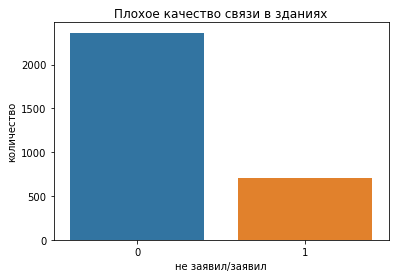

In [370]:
#распределение ответов по заданной шкале
sns.countplot(x = '3', data = dfc)
plt.xlabel('не заявил/заявил')
plt.ylabel('количество')
plt.title('Плохое качество связи в зданиях')
plt.show()

In [371]:
#Generalized Linear Model Regression Results
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      3   No. Observations:                 3070
Model:                            GLM   Df Residuals:                     3062
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1676.2
Date:                Sun, 31 Oct 2021   Deviance:                       3352.4
Time:                        18:01:17   Pearson chi2:                 3.24e+03
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Total Traffic(MB)                            -0.0007      0.000     -4.035      0.000      -0.001      -0.000
Downlink Throughput(Kbps)                 -3.879e-05   2.46e-05     -1.579      0.114   -8.69e-05    9.37e-06
Uplink Throughput(Kbps)                      -0.0008      0.000     -2.716      0.007      -0.001      -0.000
Downlink TCP Retransmission Rate(%)          -0.0469      0.022     -2.092      0.036      -0.091      -0.003
Video Streaming Download Throughput(Kbps) -4.531e-05   1.22e-05     -3.699      0.000   -6.93e-05   -2.13e-05
Video Streaming xKB Start Delay(ms)       -7.796e-05   2.83e-05     -2.754      0.006      -0.000   -2.25e-05
Web Page Download Throughput(Kbps)        -3.989e-05   2.63e-05     -1.518      0.129   -9.14e-05    1.16e-05
Web Average TCP RTT(ms)                      -0.0003      0.000     -1.857      0.063      -0.001    1.77e-05
=============================================================================================================
"""

Н0 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническими показателями, которые были собраны, отсутствует - __отвергнута__.

Н1.1 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническим показателем Total Traffic(MB), существует - __принята__.

Н1.2 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническим показателем Downlink Throughput(Kbps), существует - __отвергнута__.

Н1.3 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническим показателем Uplink Throughput(Kbps), существует - __принята__.

Н1.4 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническим показателем Downlink TCP Retransmission Rate(%), существует - __отвергнута__.

Н1.5 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническим показателем Video Streaming Download Throughput(Kbps), существует - __принята__.

Н1.6 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническим показателем Video Streaming xKB Start Delay(ms), существует - __принята__.

Н1.7 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническим показателем Web Page Download Throughput(Kbps), существует - __отвергнута__.

Н1.8 - зависимость между причиной неудовлетворенности связью 'Плохое качество связи в зданиях' и техническим показателем Web Average TCP RTT(ms), существует - __отвергнута__.

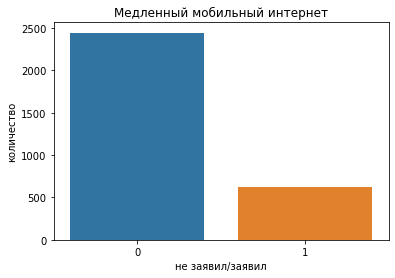

In [372]:
#распределение ответов по заданной шкале
sns.countplot(x = '4', data = dfc)
plt.xlabel('не заявил/заявил')
plt.ylabel('количество')
plt.title('Медленный мобильный интернет')
plt.show()

In [373]:
#Generalized Linear Model Regression Results
result4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      4   No. Observations:                 3070
Model:                            GLM   Df Residuals:                     3062
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1552.4
Date:                Sun, 31 Oct 2021   Deviance:                       3104.7
Time:                        18:03:47   Pearson chi2:                 3.45e+03
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=============================================================================================================
                                                coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------
Total Traffic(MB)                            -0.0005      0.000     -2.925      0.003      -0.001      -0.000
Downlink Throughput(Kbps)                 -3.356e-05   2.88e-05     -1.164      0.244   -9.01e-05     2.3e-05
Uplink Throughput(Kbps)                      -0.0010      0.000     -2.976      0.003      -0.002      -0.000
Downlink TCP Retransmission Rate(%)          -0.0425      0.022     -1.924      0.054      -0.086       0.001
Video Streaming Download Throughput(Kbps) -9.824e-05   1.56e-05     -6.278      0.000      -0.000   -6.76e-05
Video Streaming xKB Start Delay(ms)       -6.428e-05   2.77e-05     -2.322      0.020      -0.000      -1e-05
Web Page Download Throughput(Kbps)        -7.351e-05   3.36e-05     -2.186      0.029      -0.000   -7.61e-06
Web Average TCP RTT(ms)                       0.0002      0.000      1.141      0.254      -0.000       0.000
=============================================================================================================
"""

Н0 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническими показателями, которые были собраны, отсутствует - __принята__.

Н1.1 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническим показателем Total Traffic(MB), существует - __отвергнута__.

Н1.2 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническим показателем Downlink Throughput(Kbps), существует - __принята__.

Н1.3 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническим показателем Uplink Throughput(Kbps), существует - __отвергнута__.

Н1.4 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническим показателем Downlink TCP Retransmission Rate(%), существует - __принята__.

Н1.5 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническим показателем Video Streaming Download Throughput(Kbps), существует - __принята__.

Н1.6 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническим показателем Video Streaming xKB Start Delay(ms), существует - __принята__.

Н1.7 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническим показателем Web Page Download Throughput(Kbps), существует - __принята__.

Н1.8 - зависимость между причиной неудовлетворенности связью 'Медленный мобильный интернет' и техническим показателем Web Average TCP RTT(ms), существует - __отвергнута__.

#### Результаты:
Все выявленные статистически значимые связи отрицательны, т.е. уменьшение показателей метрик уменьшает вероятность неудовлетворенности связи по рассмотренным причинам

#### 3. Расчет унифицированных характеристик значимости метрик для продукта на основе коефициентов значимости расчитанных моделей

In [424]:
#коэффициент значимости метрики в отношении притензиозности клиентов
stat = pd.read_csv('stat.csv', index_col=0, sep=',')
stat = stat.reset_index()
stat[stat['P>|z|'] <= 0.05].groupby('index')['coef'].mean()

index
Downlink TCP Retransmission Rate(%)         -0.059250
Total Traffic(MB)                           -0.000833
Uplink Throughput(Kbps)                     -0.000867
Video Streaming Download Throughput(Kbps)   -0.000058
Video Streaming xKB Start Delay(ms)         -0.000071
Web Average TCP RTT(ms)                     -0.000500
Web Page Download Throughput(Kbps)          -0.000074
Name: coef, dtype: float64

#### Вывод:
Цели исследования достигнуты, установлено, что существует зависимость между оценкой, которую ставит клиент в опросе, и техническими показателями Web Average TCP RTT(ms), Downlink TCP Retransmission Rate(%). Обе зависимости отрицательные, свойства которых отражены в summary linear_ordinal_regression (см. выше).

Кроме того, результаты исследования причин неудовлетворенности пользователей диктуют простое правило при котором увеличение показателей метрик 'Downlink TCP Retransmission Rate(%)', 'Total Traffic(MB)' и 'Uplink Throughput(Kbps) ' снижает вероятность неудовлетворенности пользователя.

Наиболее значимая метрика - Downlink TCP Retransmission Rate(%), именно над ней необходимо работать в первую очередь.